# Monte-Carlo vs Black-Scholes pricing

The idea here is to compare Monte Carlo and Black Scholes pricing of a call european option

### Importing the libraries needed

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set_style('whitegrid')
Na = norm.cdf

Defining the parameters

In [2]:
S = 100 #stock price S_{0}
K = 110 # strike
T = 1 # time to maturity
r = 0.5 # risk free risk in annual %
q = 0 # annual dividend rate
sigma = 0.05 # annual volatility in %
steps = 100 # time steps
N = 10000 # number of trials

## 1 : Black Scholes Pricing Formula

In [3]:
def pricing_BS(S, K, T, r, sigma):
    d1 = (np.log((S/K)) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * Na(d1) - K * np.exp(-r*T)* Na(d2)

## 2 : Monte Carlo European Call Pricing

Estimating an european call option price via Monte Carlo simulation can be divided into 3 parts:
1. Simulating market paths
2. Defining the payoff function
3. Computing the mean payoff over all paths

### 1 : Generating paths
Here we simulate market paths by using a Black-Scholes simulator. 

Text(0.5, 1.0, 'Stock Price Simulation')

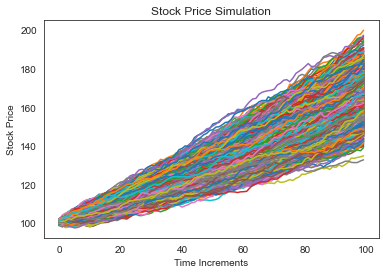

In [4]:
def create_paths(S, T, r, q, sigma, steps, N):
    dt = T/steps
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2) * dt + sigma * np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0) 
    return np.exp(ST)

paths= create_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths)
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation")

### 2 : Defining the payoff

The Call payoff is given by $Payoff = \max\big( (S_t - K),0\big)$, with $S_T$ the price of the option at maturity, and $K$ the strike

In [5]:
def pay_off(K,x):
    return max(0,x-K)

### 3 : Computing the option price

In [6]:
def MC_price(N,S,T,r, q,sigma,steps):
    paths = create_paths(S,T,r, q,sigma,steps,N)
    L = [pay_off(K,paths[-1][i])*np.exp(-r*T) for i in range(len(paths[-1]))]
    call_price = np.mean(L)
    return call_price,L


display('Monte Carlo Price estimation :',MC_price(N,S,T,r, q,sigma,steps)[0],'Black-Scholes Price estimation :',pricing_BS(S,K,T,r,sigma))

'Monte Carlo Price estimation :'

33.25224878618905

'Black-Scholes Price estimation :'

33.28162743161032

# Observing the convergence as the number of simulations rises

In [13]:
N = 1000
prices = np.array(MC_price(N,S,T,r, q,sigma,steps)[1])
price_estimation = []
for idx in range(len(prices)):
    price_estimation.append(prices[:idx+1].mean())

Text(0, 0.5, 'Price')

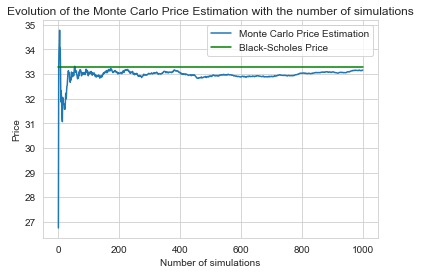

In [24]:
plt.plot(price_estimation,label='Monte Carlo Price Estimation')
plt.plot([pricing_BS(S,K,T,r,sigma)]*N,color='g',label='Black-Scholes Price')
plt.legend()
plt.title('Evolution of the Monte Carlo Price Estimation with the number of simulations')
plt.xlabel('Number of simulations')
plt.ylabel('Price')
#plt.ylim(0,50)

Text(0, 0.5, 'Relative Error (in %)')

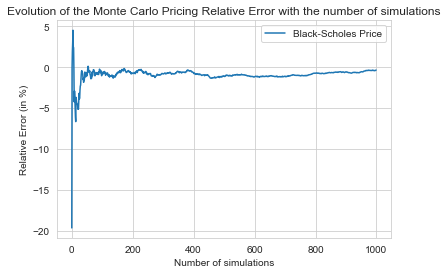

In [21]:
Relative_Error = 100*(price_estimation-np.array([pricing_BS(S,K,T,r,sigma)]*N))/pricing_BS(S,K,T,r,sigma)
plt.plot(Relative_Error,label='Black-Scholes Price')
plt.legend()
plt.title('Evolution of the Monte Carlo Pricing Relative Error with the number of simulations')
plt.xlabel('Number of simulations')
plt.ylabel('Relative Error (in %)')
#plt.ylim(0,50)

In [10]:
def detect_threshold(seuil):
    A = abs(Relative_Error)>seuil
    return(f'After {A.cumsum().argmax()} simulations the errors stays below {seuil}%')

In [11]:
N = 200000
prices = np.array(MC_price(N,S,T,r, q,sigma,steps)[1])
price_estimation = []
for idx in range(len(prices)):
    price_estimation.append(prices[:idx+1].mean())
Relative_Error = 100*(price_estimation-np.array([pricing_BS(S,K,T,r,sigma)]*N))/pricing_BS(S,K,T,r,sigma)

detect_threshold(5),detect_threshold(1),detect_threshold(0.1),detect_threshold(0.05)

('After 1 simulations the errors stays below 5%',
 'After 254 simulations the errors stays below 1%',
 'After 29666 simulations the errors stays below 0.1%',
 'After 118528 simulations the errors stays below 0.05%')